<div align="center"><img src="../images/LKYCIC_Header.jpg"></div>

# 3-03-01: Static Mapping

Static Mapping is best for scenarios where a fixed image is sufficient, such as reports, presentations, and printed materials.

Interactive Mapping is best for scenarios where user engagement and interaction with the map are beneficial, such as web applications, dashboards, and exploratory data analysis. 

For interactive mapping, please go to [3-03-02: Interactive Mapping](./3-03-02_interactivemapping.ipynb).

## Static Mapping

In [ ]:
%pip install cartopy OWSLib

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import geopandas as gpd

`ax.coastlines()` add coastal **outlines** to the current axes from the Natural Earth
"coastline" shapefile collection.

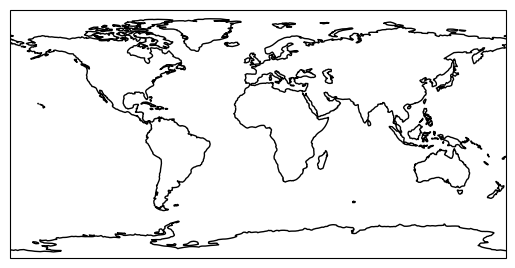

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree()) # Create a GeoAxes in the tile's projection
ax.coastlines() # Add coastlines

plt.show() # Display the plot

### Data Preparation

Read the Ho Chi Minh City metro station shapefile and plot it.

In [ ]:
# read opened_metro_a.shp

metro_hcmc_a = gpd.read_file('../data/raw/part_iii/HCMC_Metro/opened_metro_a.shp')

metro_hcmc_a.head()

Name Descriptio metro  sequence corrected cor_code  Status  \
0  Ben Thanh market       None    LA         1    Line 1     LA01       1   
1       Opera House       None    LA         2    Line 1     LA02       1   
2            Ba Son       None    LA         3    Line 1     LA03       1   
3         Van Thanh       None    LA         4    Line 1     LA04       1   
4          Tan Cang       None    LA         5    Line 1     LA05       1   

                         geometry  
0  POINT Z (106.69838 10.77151 0)  
1   POINT Z (106.7026 10.77594 0)  
2   POINT Z (106.70737 10.7816 0)  
3    POINT Z (106.7151 10.7941 0)  
4  POINT Z (106.72299 10.79853 0)

<Axes: >

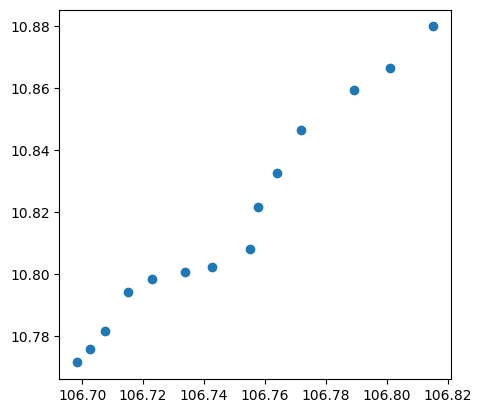

In [ ]:
metro_hcmc_a.plot()

### Plot it on a basemap

`ax.stock_img()` adds a stock background image to the map plot, which is a pre-rendered image of the Earth.

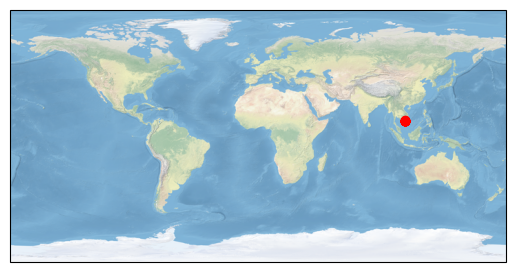

In [5]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img() # Add a stock background image

metro_hcmc_a.plot(ax=ax, color='red')

plt.show() # Display the plot

This function offers a **default** basemap.

We can use the [contextily](https://contextily.readthedocs.io/en/latest/) package, which allows you to add various types of basemaps to the plots.

<div align="center">
    <img src="../images/tiles_contexily.webp">
    <br><b>Available tiles from contexily.</b>
    <br><u>Source: https://contextily.readthedocs.io/en/latest/#id1</u>
</div>

What is tiles?

Tiles of a map are **small, square or rectangular sections** that collectively form the complete map, often used in digital mapping systems to display a large area in manageable pieces.

In the context of **raster data**, each tile contains pixel-based information representing spatial features or imagery in a specific area.

You can create you own map tile on mapbox and use it with contexily.

References

1. [Map Tiles: Everything You Need To Know](https://carto.com/blog/map-tiles-guide)

In [ ]:
#%pip install contextily

In [9]:
import contextily as ctx

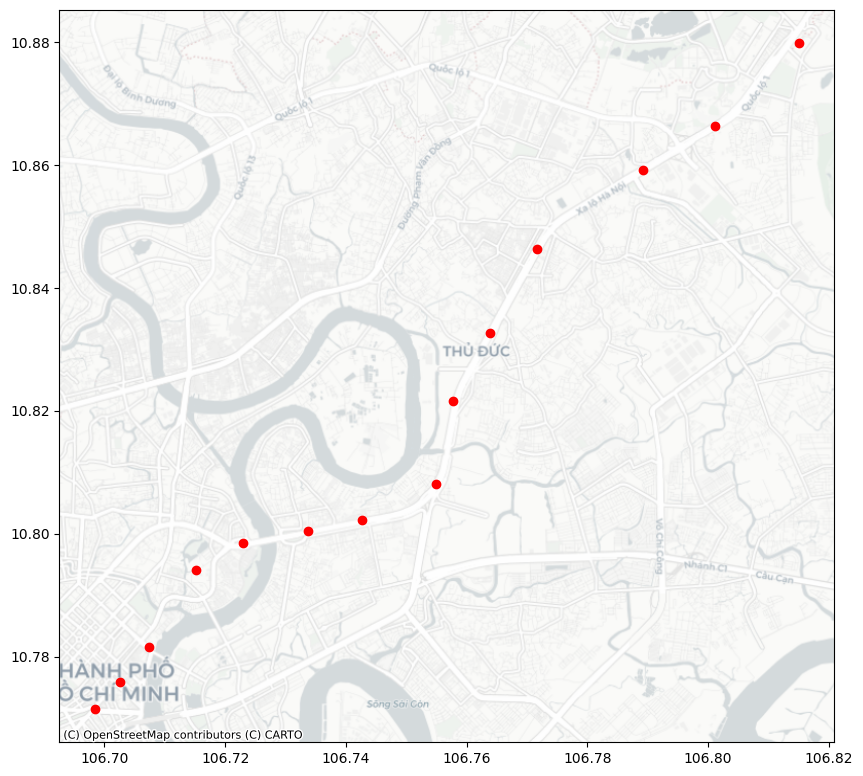

In [13]:
# Create the plot with the GeoDataFrame
ax = metro_hcmc_a.plot(color='red', figsize=(10, 10))

# Add the Google Street basemap
ctx.add_basemap(ax, source = ctx.providers.CartoDB.Positron, crs=metro_hcmc_a.crs)

plt.show()  # Display the plot

You can customise the plotted extent by setting the limits of the x and y axes using ax.set_xlim() and ax.set_ylim(). 

This allows you to zoom in or out to a specific area of interest:

In [ ]:
area_of_interest = metro_hcmc_a.total_bounds
area_of_interest

array([106.6983846,  10.7715122, 106.8150838,  10.8798194])

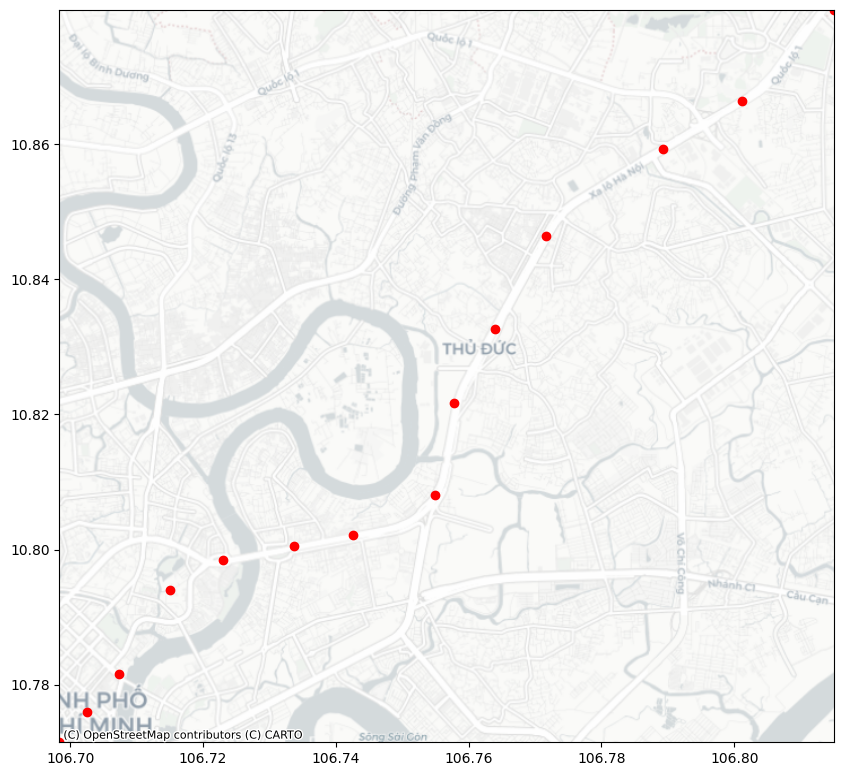

In [14]:
# Create the plot with the GeoDataFrame
ax = metro_hcmc_a.plot(color='red', figsize=(10, 10))

# Add the Google Street basemap
ctx.add_basemap(ax, source = ctx.providers.CartoDB.Positron, crs=metro_hcmc_a.crs)

area_of_interest = metro_hcmc_a.total_bounds

ax.set_xlim(area_of_interest[[0, 2]])
ax.set_ylim(area_of_interest[[1, 3]])

plt.show()  # Display the plot

`Challenge 1`: We want to zoom in a specific train station, Opera House? How to define the area of interests?

We can use [Google Map](https://www.google.com/maps/search/) to find the coordinates.

As we taught in the geocoding, when searching for certail address, the most specific, the more accurate the output will be.

In this case, the search syntax will be:

`"Opera House" ---> "Opera House mrt station hcmc"`

Right click on the map, the coordinates will be copied.

In this case, the longitude and latitude will be [106.702, 10.775]

In [38]:
#————————————————————————————————————————————————#

#————————————————————————————————————————————————#

HCMC_Boundary.geojson

We have a Ho Chi Minh City adminstrative Boundary. The file path is:

`../data/raw/part_iii/HCMC_Boundary.geojson`

`Challenge 2`: Can you import it and plot it on the map?

Extra requirement:

The fill colour should be **transparent**, the edge colour could be any colour you like, but with **dotted line** with linewidth at least 2.

In [7]:
# Load the GeoDataFrame
hcmc_boundary = gpd.read_file('../data/raw/part_iii/HCMC_Boundary.geojson')

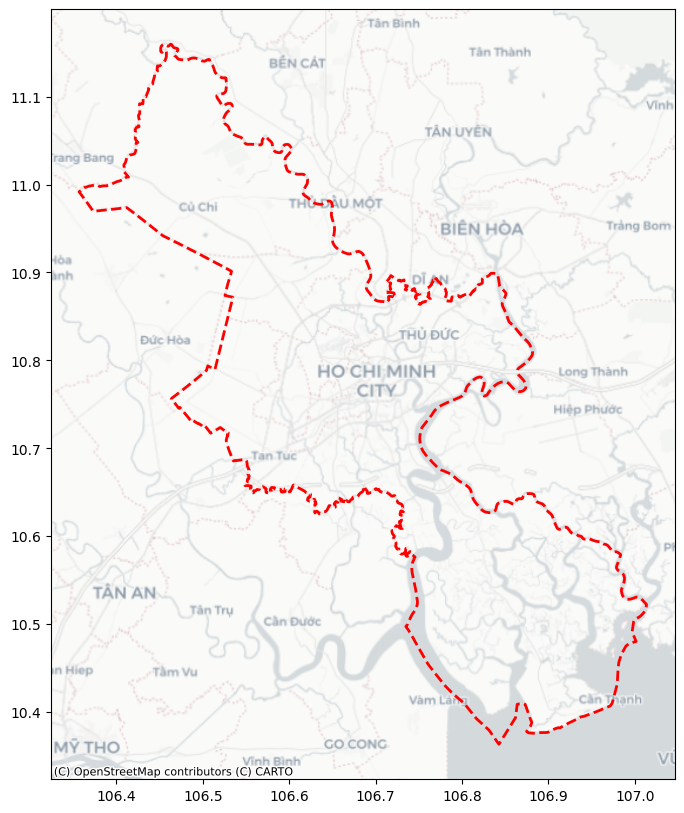

In [41]:
# Create the plot with the GeoDataFrame
ax = hcmc_boundary.plot(edgecolor='red', facecolor='none', linestyle='--', linewidth=2, figsize=(10, 10))

# Add the Google Street basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=hcmc_boundary.crs)

plt.show()  # Display the plot

`Task`: **hide the labels** in the axises and add title

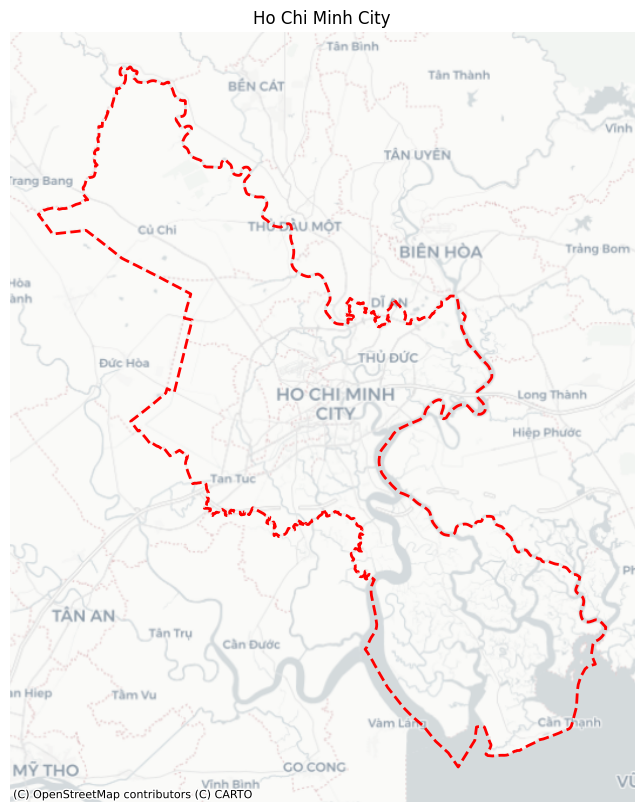

In [63]:
# Create the plot with the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
hcmc_boundary.plot(ax=ax, edgecolor='red', facecolor='none', linestyle='--', linewidth=2)

# Add the Google Street basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=hcmc_boundary.crs)

#————————————————————————————————————————————————————————————————————————————————————#
# Hide the axis labels
ax.set_axis_off()

# add a title
ax.set_title('Ho Chi Minh City')
#————————————————————————————————————————————————————————————————————————————————————#

plt.show()  # Display the plot

`Task`: Add **North Arrow** to the map

Read the png file:

![North Arrow](../images/NorthArrow.png)

In [13]:
import matplotlib.image as mpimg
import numpy as np

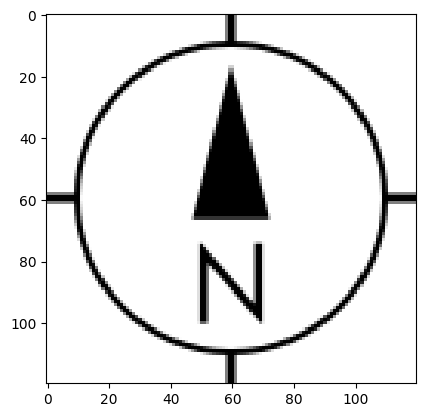

In [95]:
# Read the PNG file
image = mpimg.imread('../images/NorthArrow.png')  # Replace with the path to your image

plt.imshow(image)
plt.show()

Because the `ax.imshow` function controls the location of the image with box (extent argument).

extent : floats (left, right, bottom, top)

floats (lng_min, lng_max, lat_min, lat_mx)

The `extent` parameters also determines whether your image will be distorted or not.

Therefore, we need to write a function to calculate the **geographic content of the GeoDataFrame** and **the ratio of the image** to make **an appropriate parameters for extent**:

In [259]:
def add_north_arrow(ax, image_path, gdf, padding=0.5, scale=1):
    """
    Add a north arrow to the plot, automatically positioning it based on the extent of the GeoDataFrame,
    while preserving the image's aspect ratio.

    Parameters:
    - padding: Fractional padding to add around the image (default is 0.5).
    """
    # Get the bounds of the geographical extent of the GeoDataFrame
    xmin, ymin, xmax, ymax = gdf.total_bounds

    wpd = (xmax - xmin) * padding  # Calculate the width padding
    hpd = (ymax - ymin) * padding  # Calculate the height padding

    # Load the North arrow image
    north_arrow_img = mpimg.imread(image_path)

    # Get the original dimensions of the North arrow image
    img_height, img_width, _ = north_arrow_img.shape

    # Set the desired image height and width while maintaining the aspect ratio
    arrow_height = (ymax - ymin) * 0.05 * scale  # Set the height of the arrow as a fraction of the map height (e.g., 5%)
    arrow_width = arrow_height * (img_width / img_height)  # Calculate the width based on the aspect ratio
    
    # Adjust the bounds to make space for the North arrow
    xmin -= 0.05 
    ymax += 0.05

    # Set the extent for placing the image in the top-left corner with padding
    ax.imshow(north_arrow_img, extent=[xmin + wpd, xmin + wpd + arrow_width,
                                       ymax - hpd - arrow_height, ymax - hpd],
              aspect='auto', zorder=10)

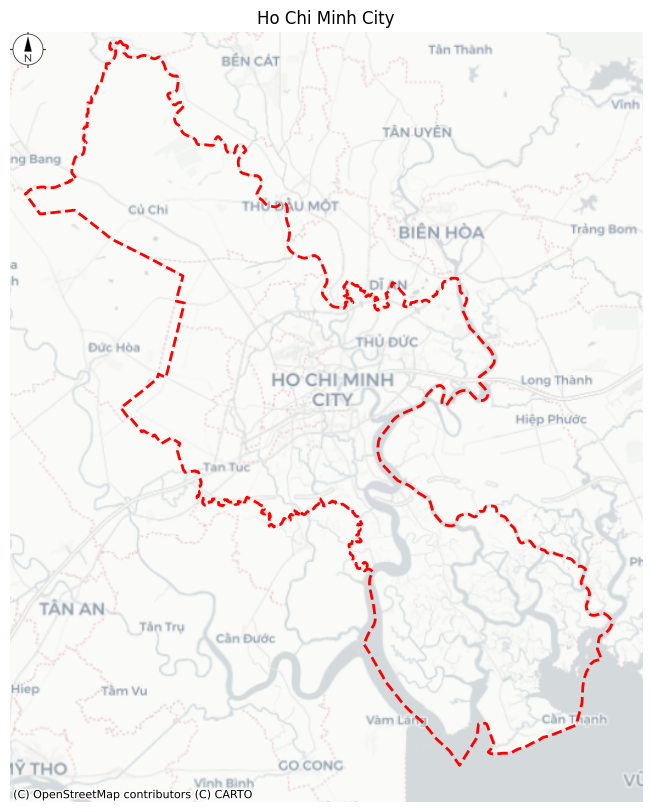

In [66]:
# Create the plot with the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))

#————————————————————————————————————————————————————————————————————————————————————#
#——————————————————— Add North Arrow Using Pre-defined Function —————————————————————#
#————————————————————————————————————————————————————————————————————————————————————#
add_north_arrow(ax, '../images/NorthArrow.png', hcmc_boundary, padding=0.05)
#————————————————————————————————————————————————————————————————————————————————————#

hcmc_boundary.plot(ax=ax, edgecolor='red', facecolor='none', linestyle='--', linewidth=2)

# Add the Google Street basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=hcmc_boundary.crs)

# Hide the axis labels
ax.set_axis_off()

# add a title
ax.set_title('Ho Chi Minh City')

plt.show()  # Display the plot

**Note:**

1. Coding does not always make work easier. It is easier to just use Photoshop / GUI GIS to easily put the north arrow.

2. You may need to write your own function to cater to your needs.

3. The advantages are:

    - **Reusability**: You can reuse the functions.
    
    - **Reproducibility**: It is accurately controlled. 
    
    You can plot the north arrow at the top-left corner with different geographic data everytime.

In [74]:
from matplotlib.lines import Line2D

Overlay with the station location of Metro 1

To ensure that both layers appear in the legend, we need to **explicitly add the legend entries for each layer**.

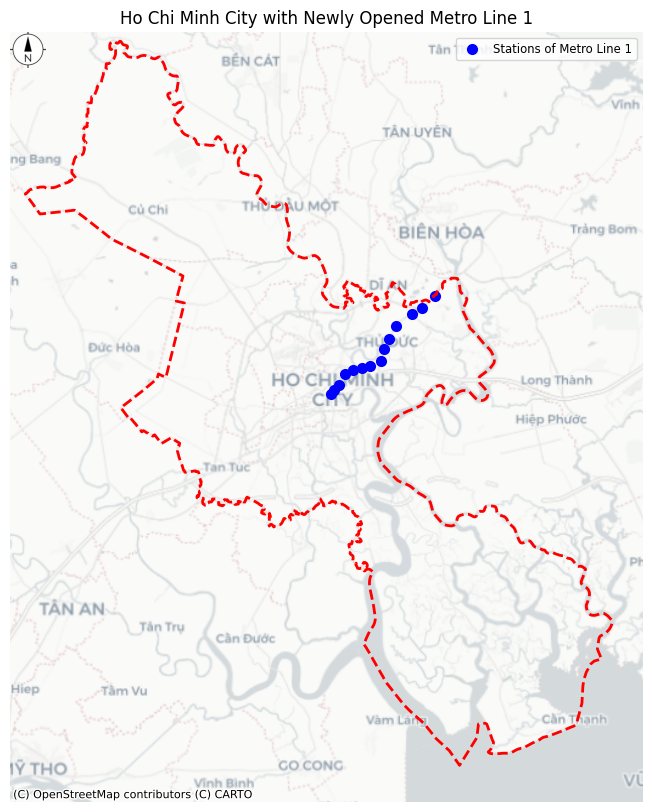

In [ ]:
# Create the plot with the GeoDataFrames
fig, ax = plt.subplots(figsize=(10, 10))

add_north_arrow(ax, '../images/NorthArrow.png', hcmc_boundary, padding=0.05)

#————————————————————————————————————————————————————————————————————————————————————#
#————————————————————————————————— metro_hcmc_a plot ————————————————————————————————#
#————————————————————————————————————————————————————————————————————————————————————#
# Plot the Metro Line 1
metro_hcmc_a.plot(ax=ax, color='blue', linewidth=2, label='Stations of Metro Line 1')
#————————————————————————————————————————————————————————————————————————————————————#

# Plot the HCMC boundary
hcmc_boundary.plot(ax=ax, edgecolor='red', facecolor='none', linestyle='--', linewidth=2)

# Add the Google Street basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=hcmc_boundary.crs)

# Add legend
ax.legend(loc='upper right', fontsize='small')

# Hide the axis labels
ax.set_axis_off()

# Add a title
ax.set_title('Ho Chi Minh City with Newly Opened Metro Line 1')

plt.show()  # Display the plot


## Replicate a Journal Map

Code to Generate Map of Research Site

<div align="center">
    <img src="../images/reference_mapping.jpg">
    <br><b>Reference Image: Map of Research Site</b>
    <br><u>Source: https://doi.org/10.1016/j.scs.2023.105043</u>
</div>

### Analyse the elements in the map

Left Map:

1. A base map

2. A Big Boundary

3. Some overlayed data

4. A Box with a text above

5. A scale bar

6. A north arrow

To add a box representing the boundary of the right plot (zoomed-in area) to the left plot (original map)

Use **matplotlib's Rectangle** to draw the box. 

In [ ]:
from matplotlib.patches import Rectangle

How to add a scale bar?

https://geopandas.org/en/stable/gallery/matplotlib_scalebar.html

In [ ]:
#!pip install matplotlib_scalebar
from matplotlib_scalebar.scalebar import ScaleBar

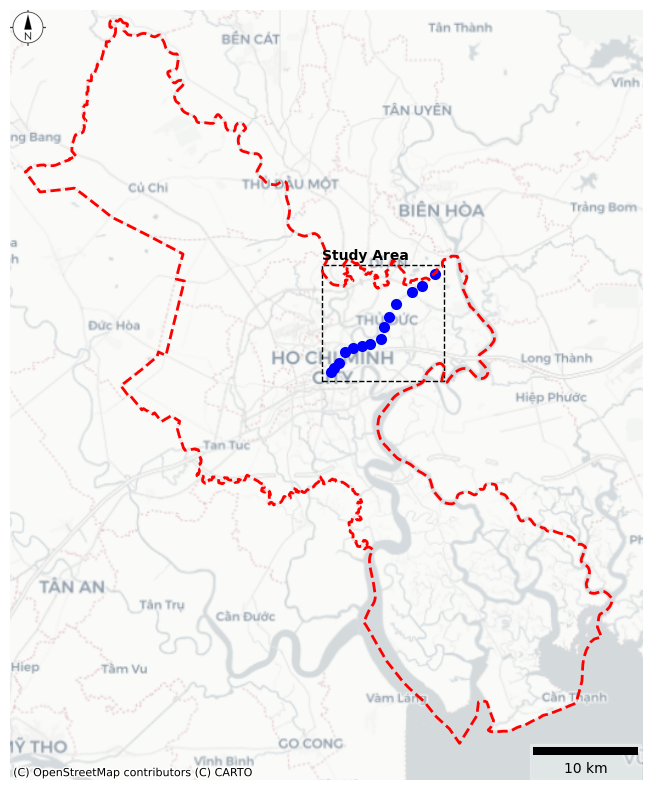

In [140]:
# Create the plot with the GeoDataFrames
fig, ax = plt.subplots(figsize=(10, 10))

#————————————————————————————————————————————————————————————————————————————————————#
#———————————————————————————————— 6. A North Arrow ——————————————————————————————————#
#————————————————————————————————————————————————————————————————————————————————————#
add_north_arrow(ax, '../images/NorthArrow.png', hcmc_boundary, padding=0.05)

#————————————————————————————————————————————————————————————————————————————————————#
#——————————————————————— 3. Some overlayed data (Metro Line 1) ——————————————————————#
#————————————————————————————————————————————————————————————————————————————————————#
# Plot the Metro Line 1
metro_hcmc_a.plot(ax=ax, color='blue', linewidth=2, label='Stations of Metro Line 1')
#————————————————————————————————————————————————————————————————————————————————————#

#————————————————————————————————————————————————————————————————————————————————————#
#———————————————————— Identify the area of interest —————————————————————————————————#
#————————————————————————————————————————————————————————————————————————————————————#

# Set the zoomed-in extent (adjust these values to focus on the metro station area)
xmin, ymin, xmax, ymax = metro_hcmc_a.total_bounds

#————————————————————————————————————————————————————————————————————————————————————#
#———————————————————— 4. Add a rectangle to the First Plot ——————————————————————————#
#————————————————————————————————————————————————————————————————————————————————————#

# Add a rectangle to the left plot to indicate the zoomed-in area
rect = Rectangle((xmin - 0.01, ymin - 0.01), xmax - xmin + 0.02, ymax - ymin + 0.02,
                 linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax.add_patch(rect)

#————————————————————————————————————————————————————————————————————————————————————#
#—————————————————— 4. Add the text above the box of research area ——————————————————#
#————————————————————————————————————————————————————————————————————————————————————#

# Add a text box in the top-left corner
ax.text(xmin - 0.01, ymax + 0.015, 'Study Area', fontsize=10, fontdict={'weight': 'bold'})

#————————————————————————————————————————————————————————————————————————————————————#
#——————————————————————— 2. A Big Boundary (Ho Chi Minh City) ———————————————————————#
#————————————————————————————————————————————————————————————————————————————————————#

# Plot the HCMC boundary
hcmc_boundary.plot(ax=ax, edgecolor='red', facecolor='none', linestyle='--', linewidth=2)

#————————————————————————————————————————————————————————————————————————————————————#
#—————————————————————————————————— 1. Base map —————————————————————————————————————#
#————————————————————————————————————————————————————————————————————————————————————#
# Add the Google Street basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=hcmc_boundary.crs)

#————————————————————————————————————————————————————————————————————————————————————#
#—————————————————————————————————— 5. Scale bar ————————————————————————————————————#
#————————————————————————————————————————————————————————————————————————————————————#
ax.add_artist(ScaleBar(84921.4496901889, dimension="si-length", units="m", location="lower right", box_alpha=0.3)) 
# distance_meters is the distance between the two points in meters = 84921.4496901889
#————————————————————————————————————————————————————————————————————————————————————#

# Hide the axis labels
ax.set_axis_off()

plt.show()  # Display the plot


Right Map:

1. A zoomed-in base map

2. Some overlayed data

3. A scale bar

4. Legend

5. A grid lined box and a text below

We will change the ax name to 'ax2' to distinguish left and right map:

/tmp/ipykernel_1337/3627664952.py:54: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax2.legend(loc='lower right', fontsize=10)


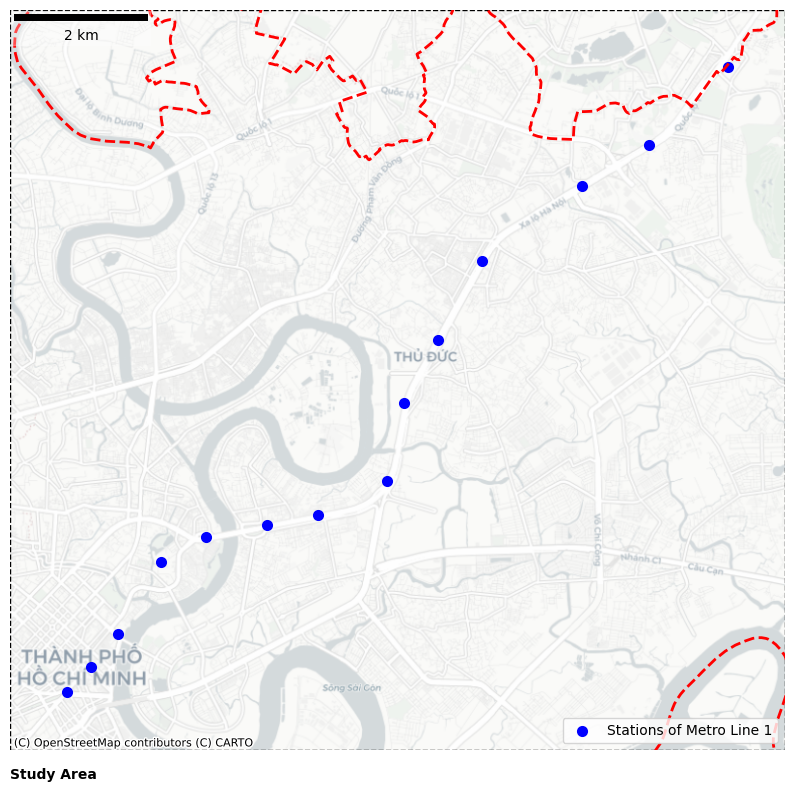

In [153]:
# Create the plot with the GeoDataFrames
fig, ax2 = plt.subplots(figsize=(10, 10))

#————————————————————————————————————————————————————————————————————————————————————#
#———————————————————— 2. Some overlayed data (Metro Line 1) —————————————————————————#
#————————————————————————————————————————————————————————————————————————————————————#
# Plot the Metro Line 1
metro_hcmc_a.plot(ax=ax2, color='blue', linewidth=2, label='Stations of Metro Line 1')
#————————————————————————————————————————————————————————————————————————————————————#

#————————————————————————————————————————————————————————————————————————————————————#
#———————————————————— Identify the area of interest —————————————————————————————————#
#————————————————————————————————————————————————————————————————————————————————————#
xmin, ymin, xmax, ymax = metro_hcmc_a.total_bounds

#————————————————————————————————————————————————————————————————————————————————————#
#———————————————————— 5. A grid lined box and a text below ——————————————————————————#
#————————————————————————————————————————————————————————————————————————————————————#

# Add a rectangle to the left plot to indicate the zoomed-in area
rect = Rectangle((xmin - 0.01, ymin - 0.01), xmax - xmin + 0.02, ymax - ymin + 0.02,
                 linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax2.add_patch(rect)

# Add a text box in the top-left corner
ax2.text(xmin - 0.01, ymin - 0.015, 'Study Area', fontsize=10, fontdict={'weight': 'bold'})

#————————————————————————————————————————————————————————————————————————————————————#
#——————————————————————— 2. A Big Boundary (Ho Chi Minh City) ———————————————————————#
#————————————————————————————————————————————————————————————————————————————————————#

# Plot the HCMC boundary
hcmc_boundary.plot(ax=ax2, edgecolor='red', facecolor='none', linestyle='--', linewidth=2, label='HCMC Boundary')

#————————————————————————————————————————————————————————————————————————————————————#
#————————————————————————— 1. A zoomed in Base map ——————————————————————————————————#
#————————————————————————————————————————————————————————————————————————————————————#
ax2.set_xlim(xmin - 0.01, xmax + 0.01)
ax2.set_ylim(ymin - 0.01, ymax + 0.01)
# Add the Google Street basemap
ctx.add_basemap(ax2, source=ctx.providers.CartoDB.Positron, crs=hcmc_boundary.crs)
#————————————————————————————————————————————————————————————————————————————————————#

#————————————————————————————————————————————————————————————————————————————————————#
#—————————————————————————————————— 3. Scale bar ————————————————————————————————————#
#————————————————————————————————————————————————————————————————————————————————————#
ax2.add_artist(ScaleBar(84921.4496901889, dimension="si-length", units="m", location="upper left", box_alpha=0.3)) 
#————————————————————————————————————————————————————————————————————————————————————#

# Hide the axis labels
ax2.set_axis_off()

# Add the legend
ax2.legend(loc='lower right', fontsize=10)

plt.show()  # Display the plot


- `plt.subplots(1, 2)`: This function creates a **figure (fig) and a grid of subplots** with 1 row and 2 columns. The 1 and 2 arguments specify **the number of rows and columns**, respectively.

- `figsize=(18, 10)`: This argument sets the **size of the entire figure** to 18 inches wide and 10 inches tall.

- `(ax1, ax2)`: These are the **Axes objects** for the two subplots. **ax1** refers to the **first subplot (left)**, and **ax2** refers to the **second subplot (right)**.

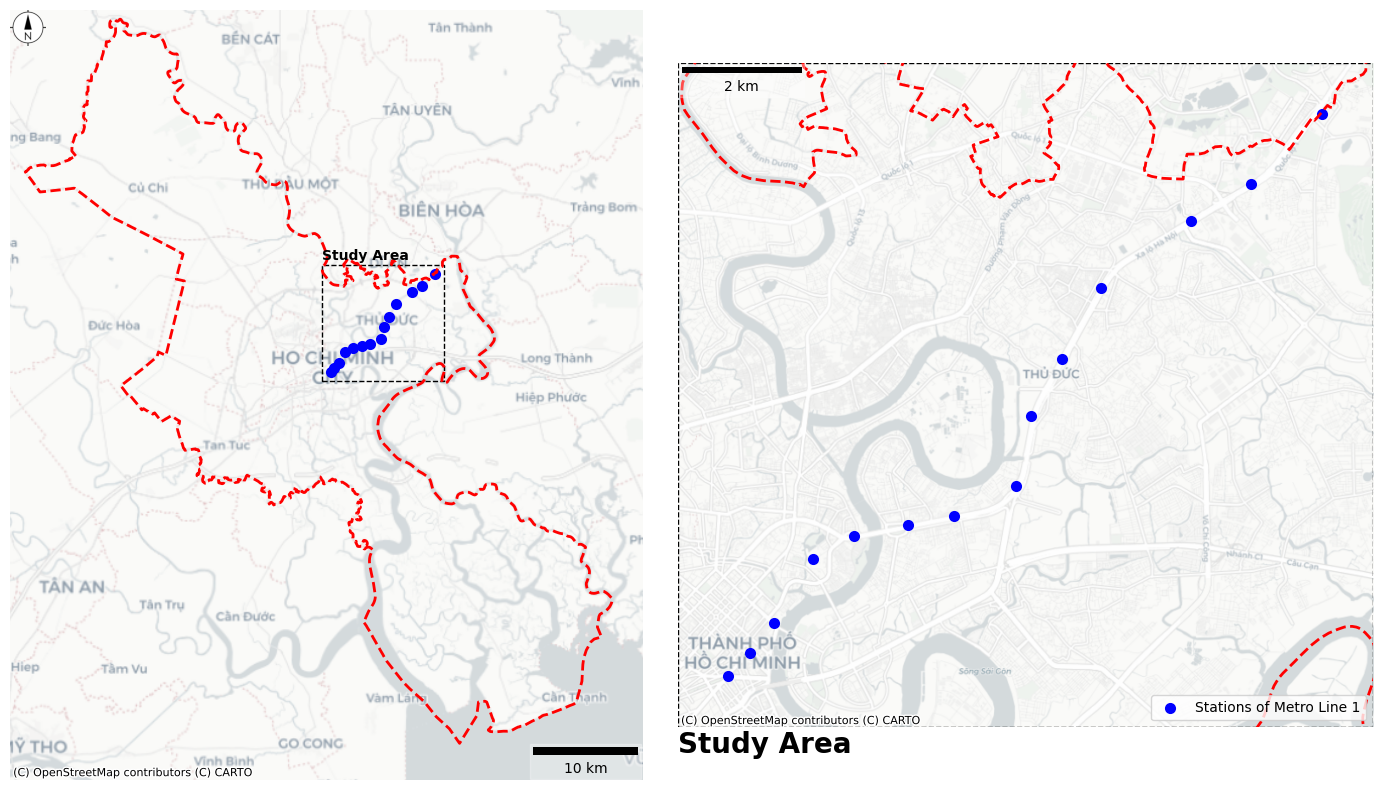

In [163]:
#————————————————————————————————————————————————————————————————————————————————————#
#———————— Create the figure and two axises with two subplots side by side ———————————#
#————————————————————————————————————————————————————————————————————————————————————#
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# Reduce the gap between subplots
plt.subplots_adjust(wspace=0.005)  # Adjust this value to reduce or increase spacing

#————————————————————————————————————————————————————————————————————————————————————#
#———————————————————————————————————— Left Plot —————————————————————————————————————#
#————————————————————————————————————————————————————————————————————————————————————#
add_north_arrow(ax1, '../images/NorthArrow.png', hcmc_boundary, padding=0.05)

metro_hcmc_a.plot(ax=ax1, color='blue', linewidth=2, label='Stations of Metro Line 1')

xmin, ymin, xmax, ymax = metro_hcmc_a.total_bounds

rect = Rectangle((xmin - 0.01, ymin - 0.01), xmax - xmin + 0.02, ymax - ymin + 0.02,
                 linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax1.add_patch(rect)

ax1.text(xmin - 0.01, ymax + 0.015, 'Study Area', fontsize=10, fontdict={'weight': 'bold'})

hcmc_boundary.plot(ax=ax1, edgecolor='red', facecolor='none', linestyle='--', linewidth=2)

ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron, crs=hcmc_boundary.crs)

ax1.add_artist(ScaleBar(84921.4496901889, dimension="si-length", units="m", location="lower right", box_alpha=0.3)) 

ax1.set_axis_off()

#————————————————————————————————————————————————————————————————————————————————————#
#——————————————————————————————————— Right Plot —————————————————————————————————————#
#————————————————————————————————————————————————————————————————————————————————————#

metro_hcmc_a.plot(ax=ax2, color='blue', linewidth=2, label='Stations of Metro Line 1')

rect = Rectangle((xmin - 0.01, ymin - 0.01), xmax - xmin + 0.02, ymax - ymin + 0.02,
                 linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax2.add_patch(rect)

ax2.text(xmin - 0.01, ymin - 0.015, 'Study Area', fontsize=20, fontdict={'weight': 'bold'})

hcmc_boundary.plot(ax=ax2, edgecolor='red', facecolor='none', linestyle='--', linewidth=2)

ax2.set_xlim(xmin - 0.01, xmax + 0.01)
ax2.set_ylim(ymin - 0.01, ymax + 0.01)

ctx.add_basemap(ax2, source=ctx.providers.CartoDB.Positron, crs=hcmc_boundary.crs)

ax2.add_artist(ScaleBar(84921.4496901889, dimension="si-length", units="m", location="upper left", box_alpha=0.3)) 

ax2.set_axis_off()

ax2.legend(loc='lower right', fontsize=10)

plt.show()  # Display the plot

Reuse the code for Singapore content:

In [232]:
# Load the GeoDataFrame
sg_boundary = gpd.read_file('../data/raw/part_iii/bivariables/sg_boundary.shp')

metro_sg_a = gpd.read_file('../data/processed/part_ii/mrt_sg/MRT_LRT_Stations.shp')

metro_lines = gpd.read_file('../data/processed/part_ii/mrt_sg/metro_lines.shp')

planning_area = gpd.read_file('../data/raw/part_ii/planningarea_sg/sg_planning_area_nosea.shp')

tampines_boundary = planning_area.query('PLN_AREA_1 == "Tampines"')
# export tampines_boundary.geometry to a polygon object
tampines_polygon = tampines_boundary.geometry.values[0]

In [ ]:
#————————————————————————————————————————————————————————————————————————————————————#
#———————— Create the figure and two axises with two subplots side by side ———————————#
#————————————————————————————————————————————————————————————————————————————————————#
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

plt.subplots_adjust(wspace=0)  # Adjust this value to reduce or increase spacing

#————————————————————————————————————————————————————————————————————————————————————#
#———————————————————————————————————— Left Plot —————————————————————————————————————#
#————————————————————————————————————————————————————————————————————————————————————#
add_north_arrow(ax1, '../images/NorthArrow.png', sg_boundary, padding=0.05, scale = 2)

metro_sg_a.plot(ax=ax1, column='mrt_line', cmap='tab20', edgecolor='white', linewidth=1, markersize=30)

metro_lines.plot(ax=ax1, column = 'mrt_line', cmap='tab20', linewidth=1, label='Metro Lines')

xmin, ymin, xmax, ymax = tampines_boundary.total_bounds

rect = Rectangle((xmin - 0.01, ymin - 0.01), xmax - xmin + 0.02, ymax - ymin + 0.02,
                 linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax1.add_patch(rect)

ax1.text(xmin - 0.01, ymax + 0.015, 'Study Area', fontsize=10, fontdict={'weight': 'bold'})

sg_boundary.plot(ax=ax1, edgecolor='black', facecolor='none', linewidth=1)

ctx.add_basemap(ax1, source=ctx.providers.CartoDB.Positron, crs=sg_boundary.crs)

ax1.add_artist(ScaleBar(84921.4496901889, dimension="si-length", units="m", location="lower right", box_alpha=0.3)) 

ax1.set_axis_off()

#————————————————————————————————————————————————————————————————————————————————————#
#——————————————————————————————————— Right Plot —————————————————————————————————————#
#————————————————————————————————————————————————————————————————————————————————————#

metro_sg_a.plot(ax=ax2, column='mrt_line', cmap='tab20', label='Stations of Metro Line 1', edgecolor='white', linewidth=1, markersize=200)

rect = Rectangle((xmin - 0.01, ymin - 0.01), xmax - xmin + 0.02, ymax - ymin + 0.02,
                 linewidth=1, edgecolor='black', facecolor='none', linestyle='--')
ax2.add_patch(rect)

ax2.text(xmin - 0.01, ymin - 0.015, 'Study Area', fontsize=20, fontdict={'weight': 'bold'})

ax2.plot(tampines_polygon.exterior.xy[0], tampines_polygon.exterior.xy[1], color='blue', linewidth=2, label='Tampines Boundary')

metro_lines.plot(ax=ax2, column = 'mrt_line', linewidth=2, label='Metro Lines')

ax2.set_xlim(xmin - 0.01, xmax + 0.01)
ax2.set_ylim(ymin - 0.01, ymax + 0.01)

ctx.add_basemap(ax2, source=ctx.providers.CartoDB.Positron, crs=sg_boundary.crs)

ax2.add_artist(ScaleBar(84921.4496901889, dimension="si-length", units="m", location="upper left", box_alpha=0.3)) 

ax2.set_axis_off()

ax2.legend(loc='lower right', fontsize=10)

plt.show()  # Display the plot

## Next Section

Go to [3-03-02: Interactive Mapping](./3-03-02_interactivemapping.ipynb)